In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # To split the data into training and testing

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# This is the distribution of the result/Outcome/Dependent data before doing anything.
x = data['Outcome'].value_counts(normalize=True)
print(f"The Outcome column contains {data['Outcome'].nunique()} values {data['Outcome'].unique()},\n and the distribution is {round((x[1])*100,2)} % and {round((x[0])*100,2)} respectively.")

The Outcome column contains 2 values [1 0],
 and the distribution is 34.9 % and 65.1 respectively.


In [4]:
independent_data = data.drop(['Outcome'], axis = 1)
dependent_data = data["Outcome"]

xtrain, xtest, ytrain, ytest = train_test_split(independent_data, dependent_data, test_size = 0.3, random_state = 50)

#SMOTE

In [5]:
from imblearn.over_sampling import SMOTE # we will be using https://imbalanced-learn.org/stable/index.html for balancing the data

In [6]:
# SMOTE - Synthetic Minority Oversampling Technique
sm = SMOTE(random_state = 50)
sm_xtrain, sm_ytrain = sm.fit_resample(xtrain, ytrain)

In [7]:
# This is how the distribution looks after using SMOTE.
x_smote = sm_ytrain.value_counts(normalize=True)
print(f"The Outcome column contains {sm_ytrain.nunique()} values {sm_ytrain.unique()},\n and the distribution is {round((x_smote[1])*100,2)} % and {round((x_smote[0])*100,2)} % respectively.")

The Outcome column contains 2 values [0 1],
 and the distribution is 50.0 % and 50.0 % respectively.


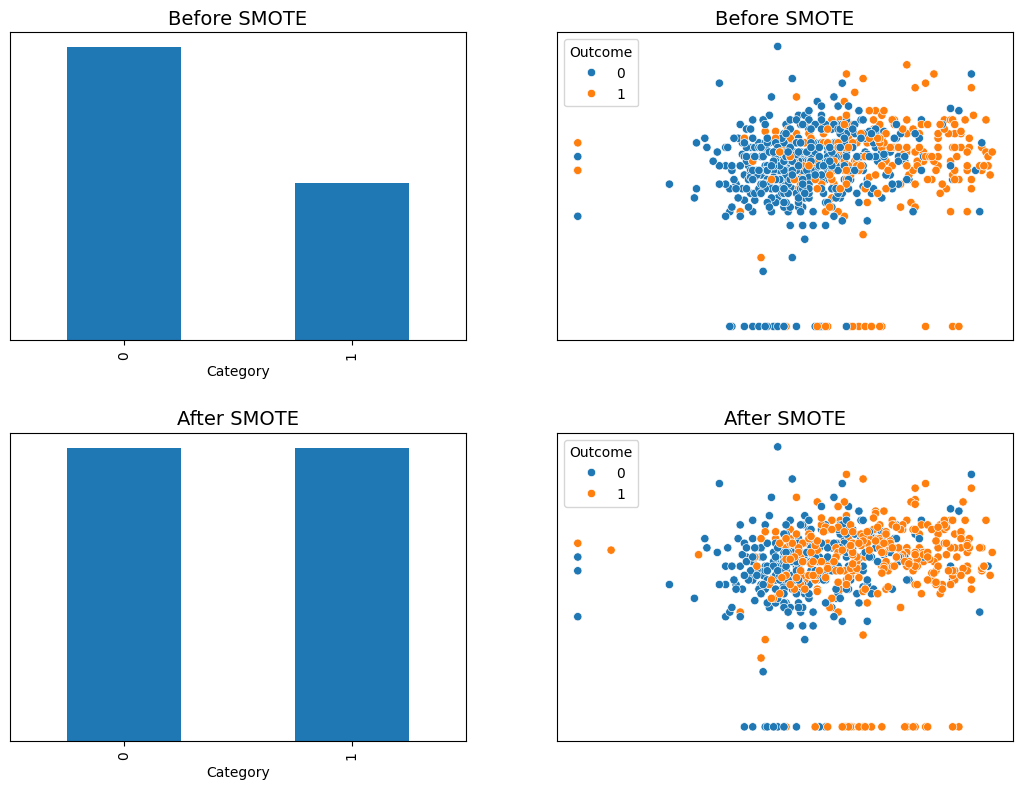

In [8]:
fig = plt.figure(figsize=(20,30))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.2, hspace=0.3)
s1 = fig.add_subplot(spec[0,0])
s2 = fig.add_subplot(spec[0,1])
s3 = fig.add_subplot(spec[1,0])
s4 = fig.add_subplot(spec[1,1])

x.plot.bar(ax = s1)
s1.set_xlabel("Category")
s1.set_title("Before SMOTE", fontsize = 14)
s1.set_yticks([])


sns.scatterplot( x = data['Glucose'], y = data['BloodPressure'], hue = data['Outcome'], ax = s2)
s2.set_yticks([])
s2.set_ylabel('')
s2.set_xticks([])
s2.set_xlabel('')
s2.set_title("Before SMOTE", fontsize = 14)


x_smote.plot.bar(ax = s3)
s3.set_xlabel("Category")
s3.set_title("After SMOTE" , fontsize = 14)
s3.set_yticks([])


sns.scatterplot( x = sm_xtrain['Glucose'], y = sm_xtrain['BloodPressure'], hue = sm_ytrain, ax = s4)
s4.set_yticks([])
s4.set_ylabel('')
s4.set_xticks([])
s4.set_xlabel('')
s4.set_title("After SMOTE", fontsize = 14)

plt.show()

# This has been plotted to compare the datasets before and after plotting.
# The scatter plot is just showing the distribution of all the points, it just a visual representation of the distribution

In [20]:
uni, count = np.unique(ytrain, return_counts = True)
print(f"The number of data points before SMOTE was{count}")
sm_uni, sm_count = np.unique(sm_ytrain, return_counts = True)
print(f"The number of data points after SMOTE is{sm_count}")

The number of data points before SMOTE was[352 185]
The number of data points after SMOTE is[352 352]


#Random under sampling


In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [11]:
us = RandomUnderSampler(random_state = 50)
us_xtrain, us_ytrain = us.fit_resample(xtrain, ytrain)

In [12]:
us_data = us_ytrain.value_counts(normalize=True)
print(f"The Outcome column contains {us_ytrain.nunique()} values {us_ytrain.unique()},\n and the distribution is {round((us_data[1])*100,2)} % and {round((us_data[0])*100,2)} % respectively.")

The Outcome column contains 2 values [0 1],
 and the distribution is 50.0 % and 50.0 % respectively.


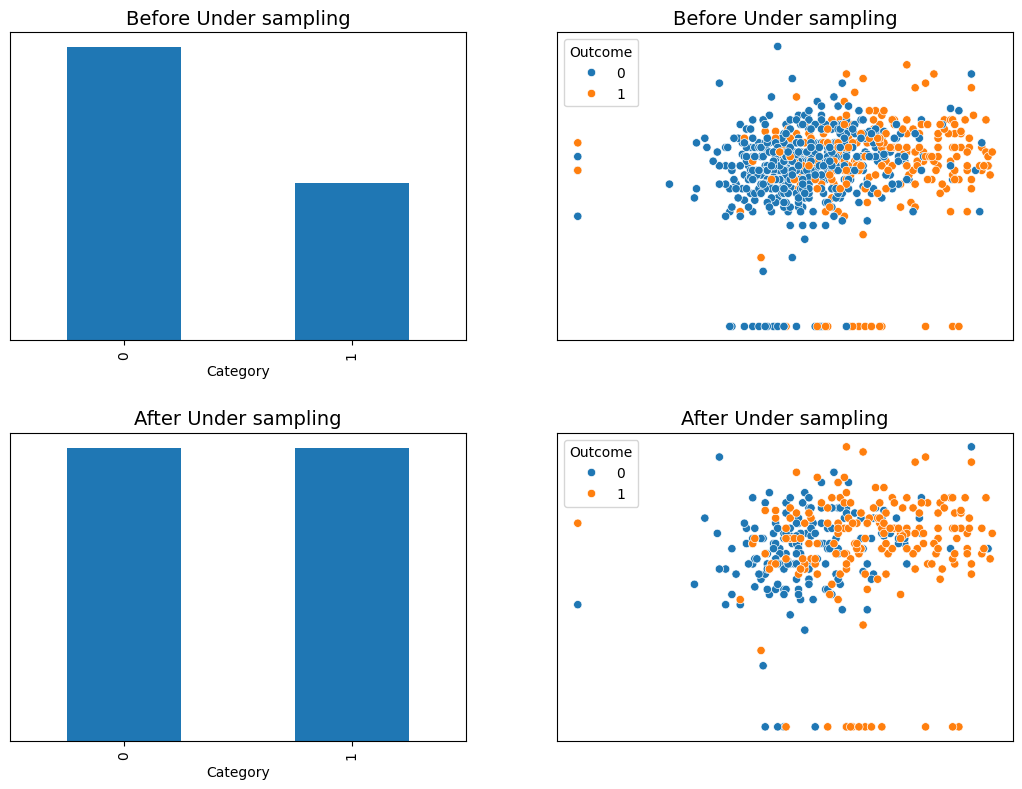

In [13]:
fig = plt.figure(figsize=(20,30))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.2, hspace=0.3)
s1 = fig.add_subplot(spec[0,0])
s2 = fig.add_subplot(spec[0,1])
s3 = fig.add_subplot(spec[1,0])
s4 = fig.add_subplot(spec[1,1])

x.plot.bar(ax = s1)
s1.set_xlabel("Category")
s1.set_title("Before Under sampling", fontsize = 14)
s1.set_yticks([])


sns.scatterplot( x = data['Glucose'], y = data['BloodPressure'], hue = data['Outcome'], ax = s2)
s2.set_yticks([])
s2.set_ylabel('')
s2.set_xticks([])
s2.set_xlabel('')
s2.set_title("Before Under sampling", fontsize = 14)


us_data.plot.bar(ax = s3)
s3.set_xlabel("Category")
s3.set_title("After Under sampling" , fontsize = 14)
s3.set_yticks([])


sns.scatterplot( x = us_xtrain['Glucose'], y = us_xtrain['BloodPressure'], hue = us_ytrain, ax = s4)
s4.set_yticks([])
s4.set_ylabel('')
s4.set_xticks([])
s4.set_xlabel('')
s4.set_title("After Under sampling", fontsize = 14)

plt.show()


In [19]:
uni, count = np.unique(ytrain, return_counts = True)
print(f"The number of data points before Under Sampling was{count}")
us_uni, us_count = np.unique(us_ytrain, return_counts = True)
print(f"The number of data points after under Sampling is{us_count}")

The number of data points before Under Sampling was[352 185]
The number of data points after under Sampling is[185 185]


# Hybrid sampling

In [15]:
from imblearn.combine import SMOTEENN

In [16]:
synt = SMOTEENN(random_state = 50)
synt_xtrain, synt_ytrain = synt.fit_resample(xtrain, ytrain)

In [17]:
synt_data = synt_ytrain.value_counts(normalize=True)
print(f"The Outcome column contains {synt_ytrain.nunique()} values {synt_ytrain.unique()},\n and the distribution is {round((synt_data[1])*100,2)} % and {round((synt_data[0])*100,2)} % respectively.")

The Outcome column contains 2 values [0 1],
 and the distribution is 57.35 % and 42.65 % respectively.


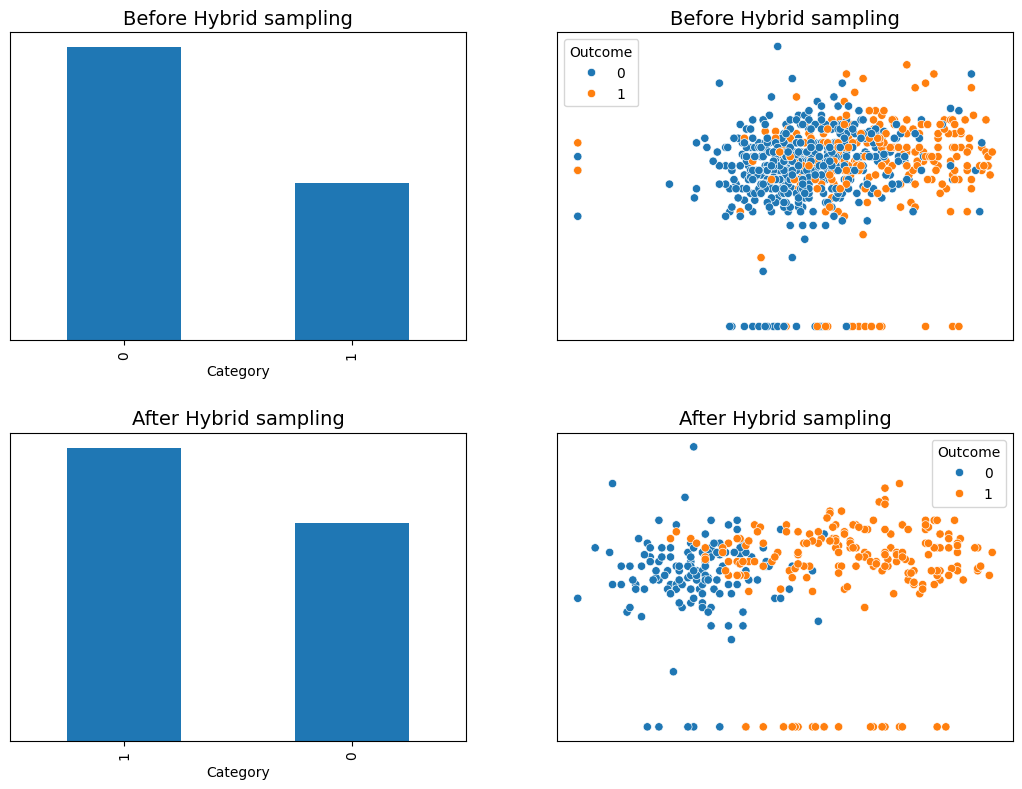

In [18]:
fig = plt.figure(figsize=(20,30))
spec = fig.add_gridspec(6,3)
spec.update(wspace=0.2, hspace=0.3)
s1 = fig.add_subplot(spec[0,0])
s2 = fig.add_subplot(spec[0,1])
s3 = fig.add_subplot(spec[1,0])
s4 = fig.add_subplot(spec[1,1])

x.plot.bar(ax = s1)
s1.set_xlabel("Category")
s1.set_title("Before Hybrid sampling", fontsize = 14)
s1.set_yticks([])


sns.scatterplot( x = data['Glucose'], y = data['BloodPressure'], hue = data['Outcome'], ax = s2)
s2.set_yticks([])
s2.set_ylabel('')
s2.set_xticks([])
s2.set_xlabel('')
s2.set_title("Before Hybrid sampling", fontsize = 14)


synt_data.plot.bar(ax = s3)
s3.set_xlabel("Category")
s3.set_title("After Hybrid sampling" , fontsize = 14)
s3.set_yticks([])


sns.scatterplot( x = synt_xtrain['Glucose'], y = synt_xtrain['BloodPressure'], hue = synt_ytrain, ax = s4)
s4.set_yticks([])
s4.set_ylabel('')
s4.set_xticks([])
s4.set_xlabel('')
s4.set_title("After Hybrid sampling", fontsize = 14)

plt.show()

In [22]:
uni, count = np.unique(ytrain, return_counts = True)
print(f"The number of data points before Hybrid Sampling was{count}")
synt_uni, synt_count = np.unique(synt_ytrain, return_counts = True)
print(f"The number of data points after Hybrid Sampling was{sm_count}")

The number of data points before Hybrid Sampling was[352 185]
The number of data points after Hybrid Sampling was[148 199]


Under sampling, over sampling, hybrid sampling....which one to use?



This actually depends upon the data and the distribution of the dependent column, in this case, I have used only one datasets to
perform all three, however, this is not how it is supposed to be.


If there are, let's say, 100 minority data points and 900 majority data points, we  should use upsampling (increase 100 to 900).

If there were 300 minority and 700 majority data points, we should use downsampling (reducing 700 to 300).

&

If it was somewhere in between, we should use hybrid.

